Apply **DBSCAN Clustering** for the **Country Status DataSet**. It contains the following data fields: country, child_mort, exports, health,	imports, income,	inflation,	life_expec,	total_fer,	gdpp

Define the Required Libraries for this problem. **(2 marks)**

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: warnings filter
import warnings
warnings.filterwarnings('ignore')

Open the CSV file and display the statistical information about the dataset **(1 mark)**

In [28]:
#Reading Dataset
df = pd.read_csv("Country-data.csv")

In [30]:
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [32]:
print("\nDataset Info:")
print(df.info())


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB
None


In [34]:
print("\nStatistical Summary:")
print(df.describe())


Statistical Summary:
       child_mort     exports      health     imports         income  \
count  167.000000  167.000000  167.000000  167.000000     167.000000   
mean    38.270060   41.108976    6.815689   46.890215   17144.688623   
std     40.328931   27.412010    2.746837   24.209589   19278.067698   
min      2.600000    0.109000    1.810000    0.065900     609.000000   
25%      8.250000   23.800000    4.920000   30.200000    3355.000000   
50%     19.300000   35.000000    6.320000   43.300000    9960.000000   
75%     62.100000   51.350000    8.600000   58.750000   22800.000000   
max    208.000000  200.000000   17.900000  174.000000  125000.000000   

        inflation  life_expec   total_fer           gdpp  
count  167.000000  167.000000  167.000000     167.000000  
mean     7.781832   70.555689    2.947964   12964.155689  
std     10.570704    8.893172    1.513848   18328.704809  
min     -4.210000   32.100000    1.150000     231.000000  
25%      1.810000   65.300000    1

In [36]:
print(df.shape)

(167, 10)


Print the correlation map and find the most related features. **(1 mark)**

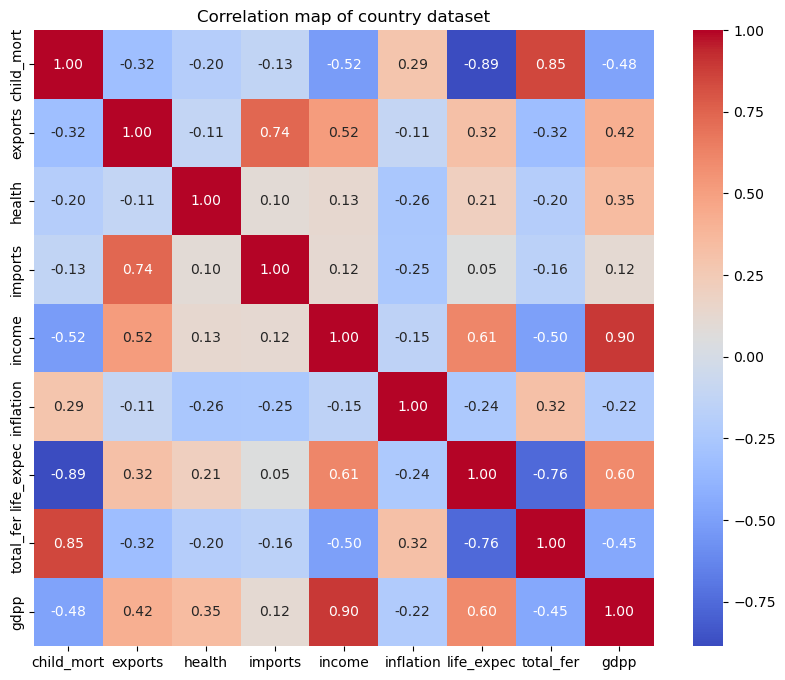

In [45]:
#Dropping non-numeric column
non_numeric_df = df.drop(columns=["country"])

#Correlation matrix
corr = non_numeric_df.corr()

#Heatmap plot
plt.figure(figsize=(10,8))
sns.heatmap(corr, annot=True, cmap="coolwarm",fmt=".2f")
plt.title("Correlation map of country dataset")
plt.show()

In [49]:
#Find the most correlated pair
corr_unstacked = corr.unstack()
sorted_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)

#Remove self_correlation
sorted_corr = sorted_corr[sorted_corr < 1.0]

print("\nMost correlated features:")
print(sorted_corr.head())


Most correlated features:
gdpp        income        0.895571
income      gdpp          0.895571
child_mort  total_fer     0.848478
total_fer   child_mort    0.848478
imports     exports       0.737381
dtype: float64


Plot a graph with the correlated features. **(1 mark)**

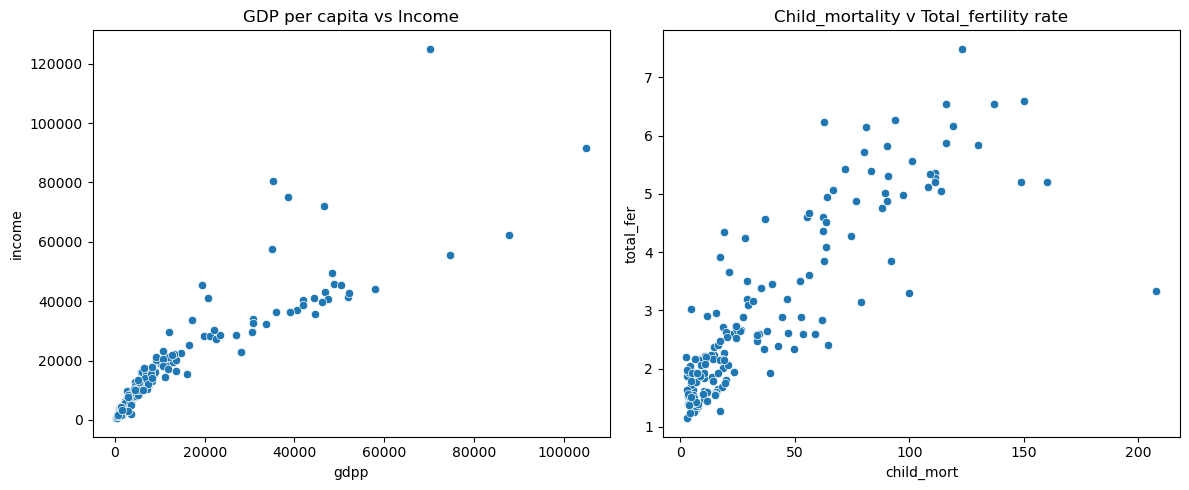

In [54]:
#Scatter plot for gdp  & income
plt.figure(figsize=(12,5))

plt.subplot(1,2,1)
sns.scatterplot(x="gdpp", y="income", data=df)
plt.title("GDP per capita vs Income")

#Scatter plot for child mort vs total_fer
plt.subplot(1,2,2)
sns.scatterplot(x="child_mort", y="total_fer", data=df)
plt.title("Child_mortality v Total_fertility rate")

plt.tight_layout()
plt.show()

Apply Elbow Method to find optimal clusters. **(1 marks)**

In [64]:
from sklearn.cluster import KMeans

# Clustering libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

In [66]:
X = non_numeric_df

#Scale the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

#Elbow method: computing inertia for different k
inertia = []
K = range(1,11)

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_scaled)
    inertia.append(kmeans.inertia_)
    

Plot Elbow curve **(1 mark)**

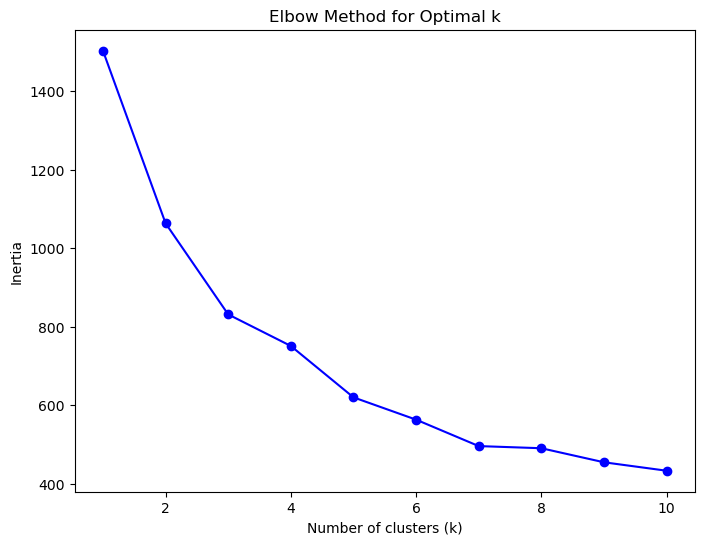

In [70]:
# Plot Elbow curve
plt.figure(figsize=(8,6))
plt.plot(K, inertia, 'bo-')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal k')
plt.show()

Apply DBSCAN to find optimal eps and minpts. **(2 marks)**

In [88]:
# Try smaller eps (clusters get tighter) and adjust min_samples
for eps in [1.0, 1.2, 1.5, 1.8]:
    for minPts in [4, 5, 6]:
        dbscan = DBSCAN(eps=eps, min_samples=minPts)
        labels = dbscan.fit_predict(X_scaled)
        unique, counts = np.unique(labels, return_counts=True)
        print(f"eps={eps}, minPts={minPts} -> Clusters: {dict(zip(unique, counts))}")

eps=1.0, minPts=4 -> Clusters: {-1: 84, 0: 56, 1: 16, 2: 7, 3: 4}
eps=1.0, minPts=5 -> Clusters: {-1: 94, 0: 52, 1: 16, 2: 5}
eps=1.0, minPts=6 -> Clusters: {-1: 113, 0: 42, 1: 12}
eps=1.2, minPts=4 -> Clusters: {-1: 50, 0: 23, 1: 76, 2: 18}
eps=1.2, minPts=5 -> Clusters: {-1: 53, 0: 21, 1: 75, 2: 18}
eps=1.2, minPts=6 -> Clusters: {-1: 63, 0: 18, 1: 68, 2: 18}
eps=1.5, minPts=4 -> Clusters: {-1: 29, 0: 138}
eps=1.5, minPts=5 -> Clusters: {-1: 30, 0: 137}
eps=1.5, minPts=6 -> Clusters: {-1: 31, 0: 136}
eps=1.8, minPts=4 -> Clusters: {-1: 20, 0: 147}
eps=1.8, minPts=5 -> Clusters: {-1: 21, 0: 146}
eps=1.8, minPts=6 -> Clusters: {-1: 22, 0: 145}


In [90]:
#Apply DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan.fit(X_scaled)

#Cluster labels
labels = dbscan.labels_
print("Cluster Labels: ", np.unique(labels))

#Count of points per cluster
unique, counts = np.unique(labels, return_counts=True)
print("Cluster distribution:", dict(zip(unique, counts)))


from sklearn.metrics import silhouette_score

#Evaluate clustering quality (ignoring noise = -1)
if len(set(labels)) > 1 and -1 in labels:
    score = silhouette_score(X_scaled[labels != -1], labels[labels != -1])
    print("Silhouette Score (without noise):", score)


Cluster Labels:  [-1  0  1  2]
Cluster distribution: {-1: 53, 0: 21, 1: 75, 2: 18}
Silhouette Score (without noise): 0.3850261978900379


Plot the DBSCAN clustered datapoints using scatter plot. **(1 mark)**

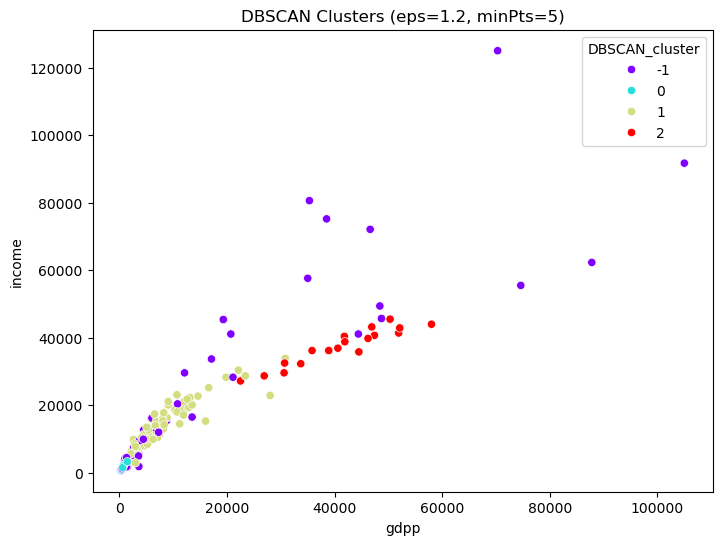

In [92]:
# Final DBSCAN with chosen parameters
dbscan = DBSCAN(eps=1.2, min_samples=5)
labels = dbscan.fit_predict(X_scaled)

# Add cluster labels to dataframe
df['DBSCAN_cluster'] = labels

# Scatter plot using two correlated features (gdpp vs income)
plt.figure(figsize=(8,6))
sns.scatterplot(x='gdpp', y='income', hue='DBSCAN_cluster', data=df, palette='rainbow')
plt.title("DBSCAN Clusters (eps=1.2, minPts=5)")
plt.show()

### DBSCAN Clustering
DBSCAN clustering grouped countries based on the density of their socio‑economic indicators, successfully identifying three main clusters along with several noise points that represented outliers. By tuning the parameters (eps=1.2, minPts=5), DBSCAN revealed meaningful groupings without needing to predefine the number of clusters, making it especially effective for detecting unusual countries with extreme values in GDP, income, or mortality rates. This approach highlighted how density‑based clustering can uncover natural structures in the data while isolating outliers that don’t fit typical patterns.